<a href="https://colab.research.google.com/github/nicolapitzalis/quick-pattern-recognition/blob/main/SpectralAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Spectral Analysis Through Instrumental Pitches
In the following we will be diving into the world of spectral analysis applied to sampled instrumental pitches.

The notebook will mainly cover differences in the spectral domain of pitches sampled by different instruments, rather than differences in tones and styles of playing. In any case, to have a more extensive knowledge of the domain of application we will have a brief discussion about the differences between harmonic instruments and inharmonic ones, in order to draw a line between expected behaviours and unexpected ones.

- **Harmonic Instruments** 🎷: These instruments, including violins, flutes, and pianos, produce sounds characterized by harmonic frequencies. The essence of their sound lies in the harmonic series, where each frequency is an integer multiple of a fundamental frequency—the pitch you perceive as the note being played. This results in a rich, cohesive sound as the harmonics blend to create the instrument's unique timbre. Through Fourier analysis, we can decompose these sounds into their individual harmonics, revealing the structured pattern of frequencies that contribute to the musical tone.
For example, a violin playing a note generates a fundamental frequency and a series of harmonics at higher frequencies. These harmonics, integral multiples of the fundamental frequency, enrich the violin's sound, giving it warmth and depth. The precise combination and intensity of these harmonics contribute to what we recognize as the violin's distinctive timbre.

- **Inharmonic Instruments** 🥁: Contrary to harmonic instruments, inharmonic instruments like cymbals, bells, and some drums, produce sounds where the frequencies do not neatly align as integer multiples of a fundamental frequency. The resulting overtones form a complex, less predictable pattern, creating sounds that are rich, unique, and often more percussive in nature. Analyzing these sounds demands advanced techniques beyond simple harmonic decomposition, as the spectral content does not conform to the orderly structure of the harmonic series.
The complexity of inharmonic sounds can be illustrated by a bell's chime. Unlike a violin, the bell's overtones are not perfect multiples of a base frequency, leading to a sound that cannot be easily broken down into simple harmonic elements. This inharmonicity contributes to the bell's distinctive ring, setting it apart from harmonic instruments.




In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# violin
violin_a4_ff = '/content/drive/MyDrive/datasets/instrumental_pitches/violin_A4_1_fortissimo_arco-normal.mp3'
violin_c4_ff = '/content/drive/MyDrive/datasets/instrumental_pitches/violin_C4_1_fortissimo_arco-normal.mp3'
violin_d4_ff = '/content/drive/MyDrive/datasets/instrumental_pitches/violin_D4_1_fortissimo_arco-normal.mp3'

# flute
flute_a4_f = '/content/drive/MyDrive/datasets/instrumental_pitches/flute_A4_1_forte_normal.mp3'
flute_c4_f = '/content/drive/MyDrive/datasets/instrumental_pitches/flute_C4_1_forte_normal.mp3'
flute_d4_f = '/content/drive/MyDrive/datasets/instrumental_pitches/flute_D4_1_forte_normal.mp3'

# percussions
bass_drum_f = '/content/drive/MyDrive/datasets/instrumental_pitches/bass-drum__1_fortissimo_struck-singly.mp3'
thai_gong_ff = '/content/drive/MyDrive/datasets/instrumental_pitches/Thai-gong__long_fortissimo_undamped.mp3'
chinese_chymbal_f = '/content/drive/MyDrive/datasets/instrumental_pitches/Chinese-cymbal__05_forte_damped.mp3'

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

## Time domain and Spectral domain analysis


Before diving into the spectrogram analysis, we firstly look at the Time and Spectral domain (without considering how the frequencies' amplitudes change over time). This will help to better understand the spectrograms and the characteristics of the particular instruments we are going to analyse.

### Violin

Starting with the A4 note we will plot its Time Domain (Amplitude/Time) and its corresponding Spectral Domain (Amplitude/Frequency) graph obtained by the DFT.

After That we will have a look at other two notes (C4 and D4).

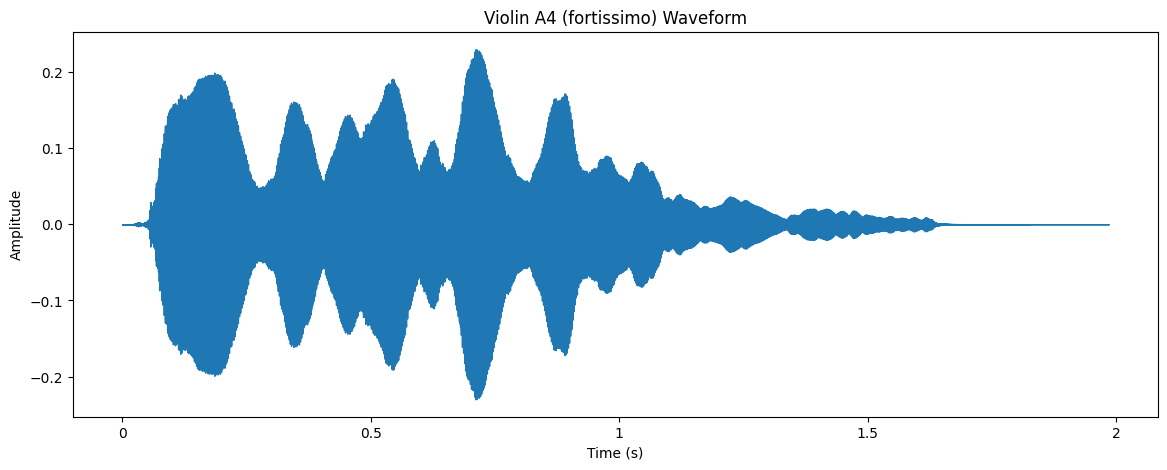

In [ ]:
y_va4ff, sr_va4ff = librosa.load(violin_a4_ff, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_va4ff, sr=sr_va4ff)
plt.title('Violin A4 (fortissimo) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

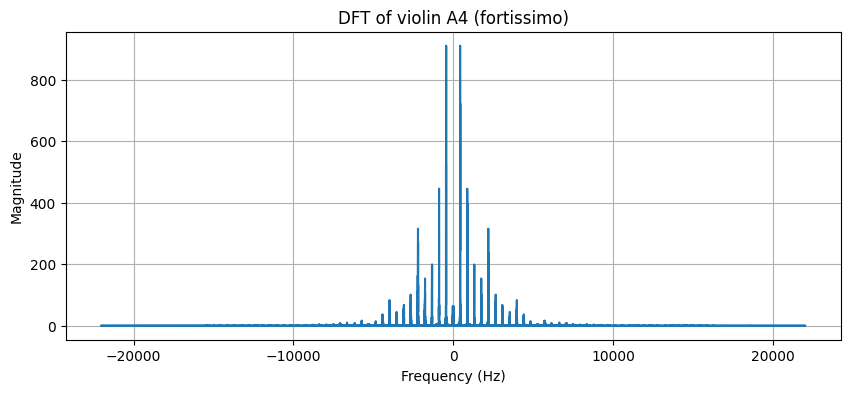

peak frequency at: 439.73067434210526 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_va4ff)

# Compute frequencies corresponding to DFT components
n = len(y_va4ff)
freq = np.fft.fftfreq(n, 1/sr_va4ff)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of violin A4 (fortissimo)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

As we should have expected the tallest peak is indeed very close to 440Hz, which is exactly the frequency of the A4 note. Also, we can observe that all the other peaks seem to be evenly spaced and thus are very prone to be representing the true harmonics.

**Note**: not all peaks are necessarily harmonics. There can be noise, artifacts from the recording environment, or resonance frequencies of the instrument body that also appear as peaks in the frequency spectrum. However, peaks that follow the harmonic series pattern are likely to be true harmonics of the note played.

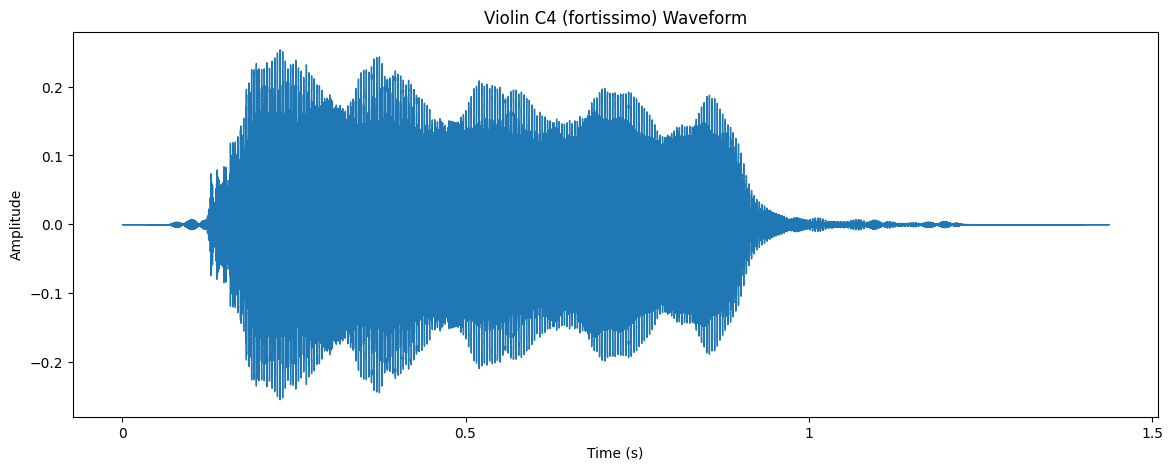

In [ ]:
y_vc4ff, sr_vc4ff = librosa.load(violin_c4_ff, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_vc4ff, sr=sr_vc4ff)
plt.title('Violin C4 (fortissimo) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

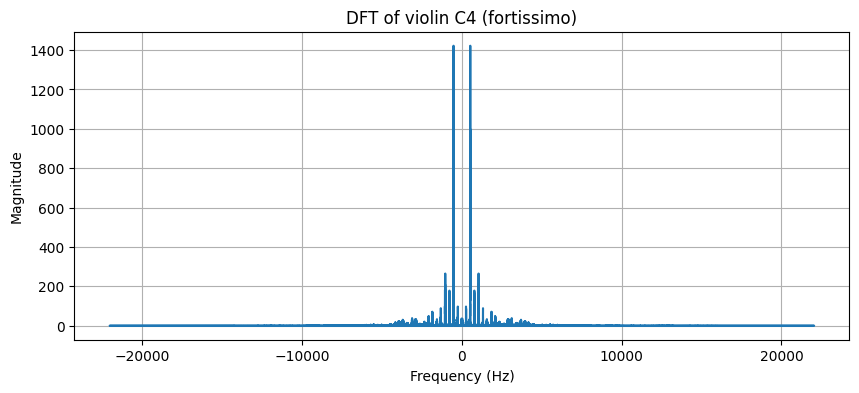

peak frequency at: 524.8011363636363 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_vc4ff)

# Compute frequencies corresponding to DFT components
n = len(y_vc4ff)
freq = np.fft.fftfreq(n, 1/sr_vc4ff)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of violin C4 (fortissimo)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

Just as an interesting note, the peak frequency of the sample is 524Hz, which is not the C4, rather one octave up: the C5. It isn't the first peak though, and in fact it does look that the first peak is exaclty the C4. It might be the case that the fortissimo, and maybe also the kind of violin itself, altogether make the second harmonic of the C4 the peak one.

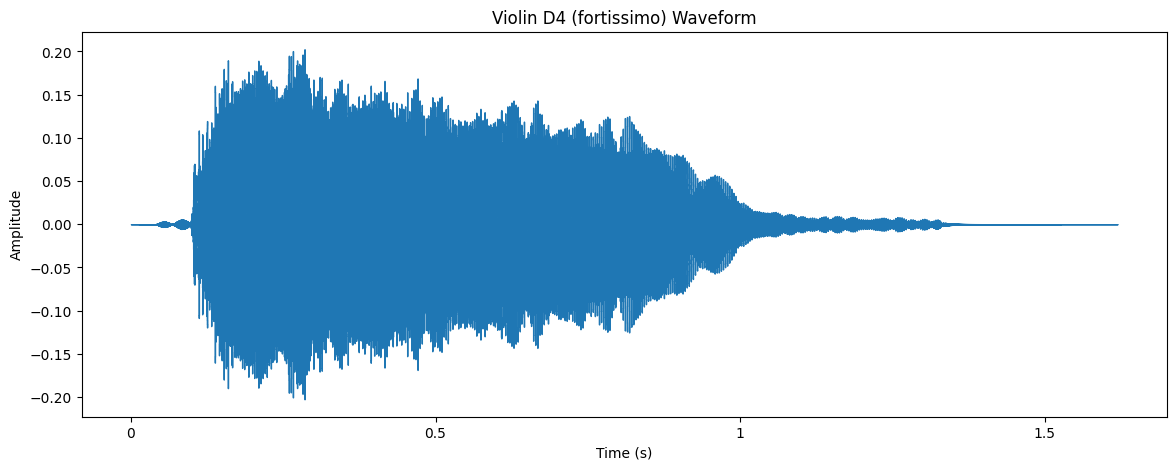

In [ ]:
y_vd4ff, sr_vd4ff = librosa.load(violin_d4_ff, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_vd4ff, sr=sr_vd4ff)
plt.title('Violin D4 (fortissimo) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

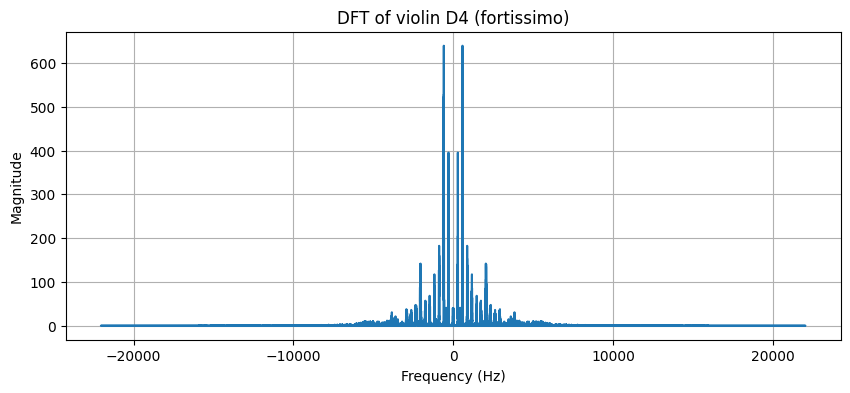

peak frequency at: 584.7152217741935 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_vd4ff)

# Compute frequencies corresponding to DFT components
n = len(y_vd4ff)
freq = np.fft.fftfreq(n, 1/sr_vd4ff)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of violin D4 (fortissimo)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

Also in this case, we can observe the same thing that happened before (the highest peak is represented by the harmonic on an octave up).

### Flute

We will have a look at the same notes observed for the violin in order to have a reasonable comparison.

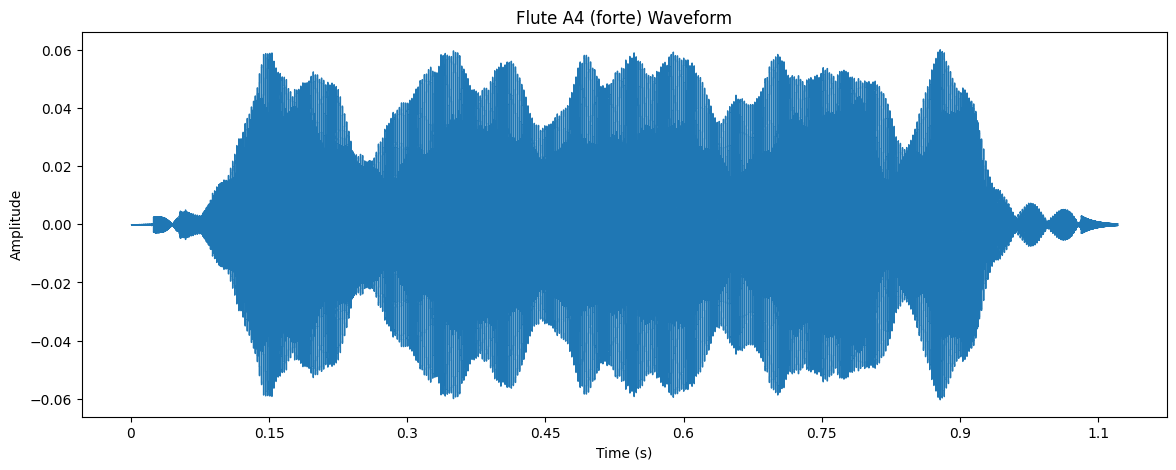

In [ ]:
y_fa4f, sr_fa4f = librosa.load(flute_a4_f, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_fa4f, sr=sr_fa4f)
plt.title('Flute A4 (forte) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

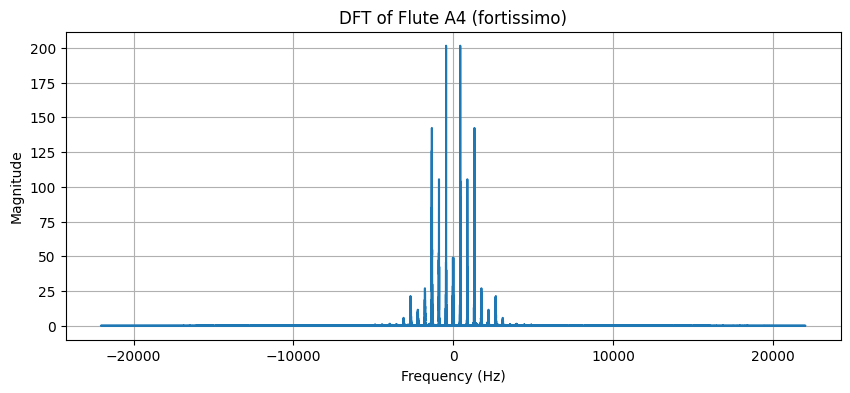

peak frequency at: 443.5022865853659 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_fa4f)

# Compute frequencies corresponding to DFT components
n = len(y_fa4f)
freq = np.fft.fftfreq(n, 1/sr_fa4f)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of Flute A4 (fortissimo)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

Up to these point, we can observe some differences between two harmonic instruments (the violin and the flute) which, altough having the same Fundamental Frequency, share different magnitude in their harmonics.

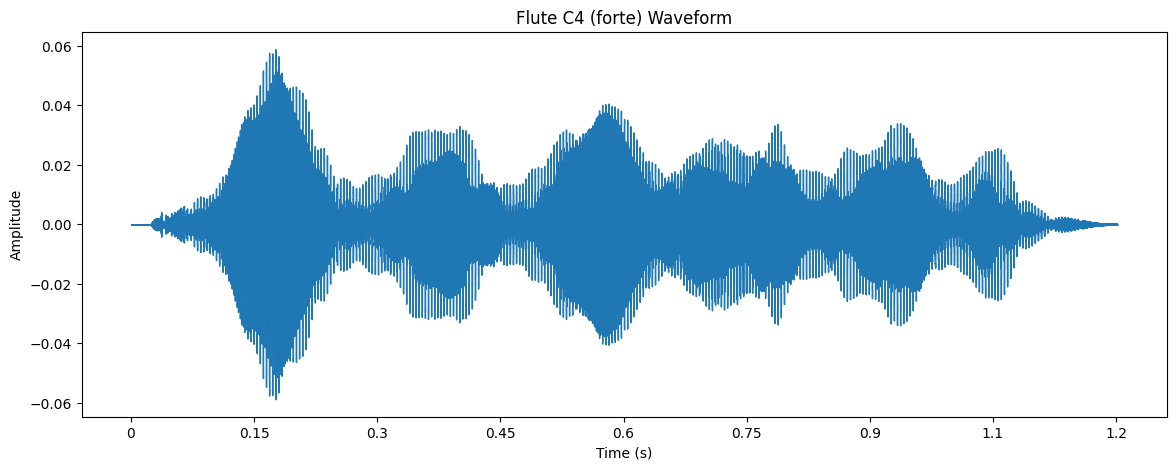

In [ ]:
y_fc4f, sr_fc4f = librosa.load(flute_c4_f, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_fc4f, sr=sr_fc4f)
plt.title('Flute C4 (forte) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

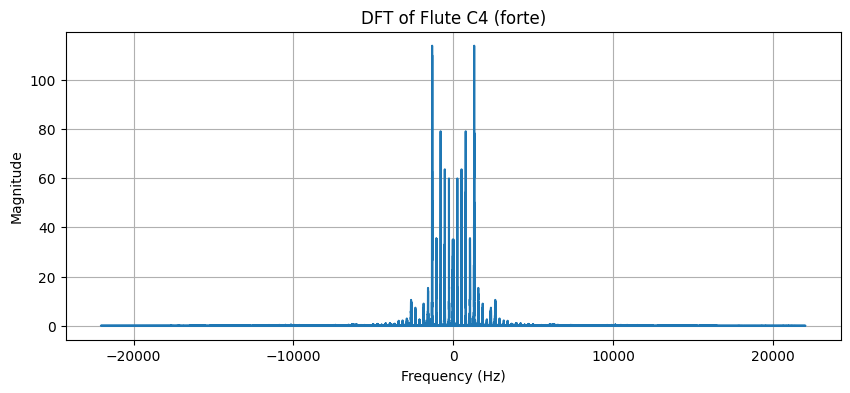

peak frequency at: 1319.038722826087 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_fc4f)

# Compute frequencies corresponding to DFT components
n = len(y_fc4f)
freq = np.fft.fftfreq(n, 1/sr_fc4f)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of Flute C4 (forte)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

Quite interestingly, here the peak frequency is some octaves up, which is quite unusual, but might be dependent on the way the instrument was being played.

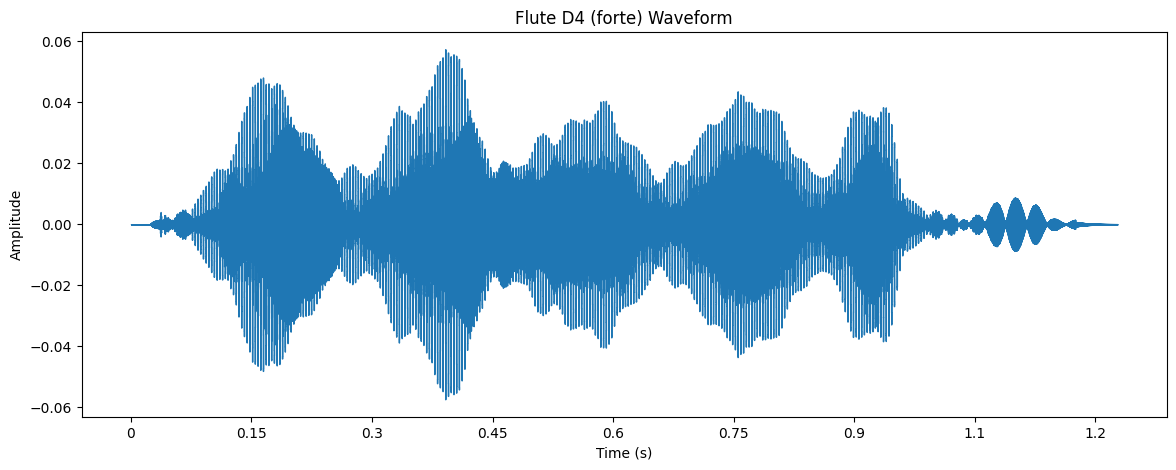

In [ ]:
y_fd4f, sr_fd4f = librosa.load(flute_d4_f, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_fd4f, sr=sr_fd4f)
plt.title('Flute D4 (forte) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

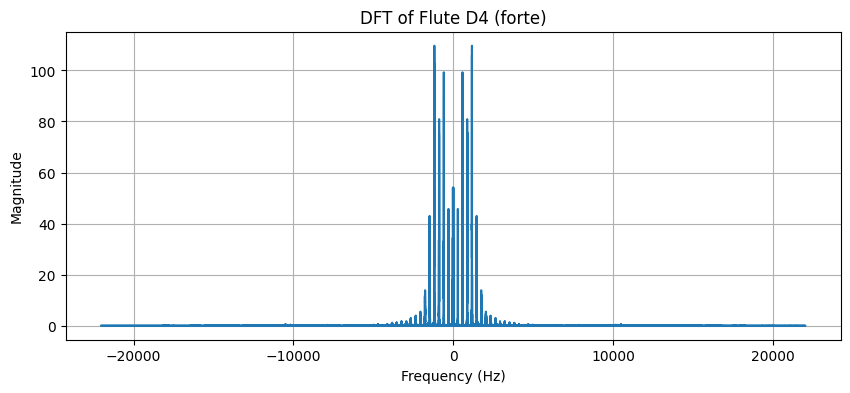

peak frequency at: 1176.1303191489362 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_fd4f)

# Compute frequencies corresponding to DFT components
n = len(y_fd4f)
freq = np.fft.fftfreq(n, 1/sr_fd4f)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of Flute D4 (forte)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

Same as before, the peak stands at some octaves up.

### Percussions

Let's now have a look at a inharmonic instrument: the Bass Drum

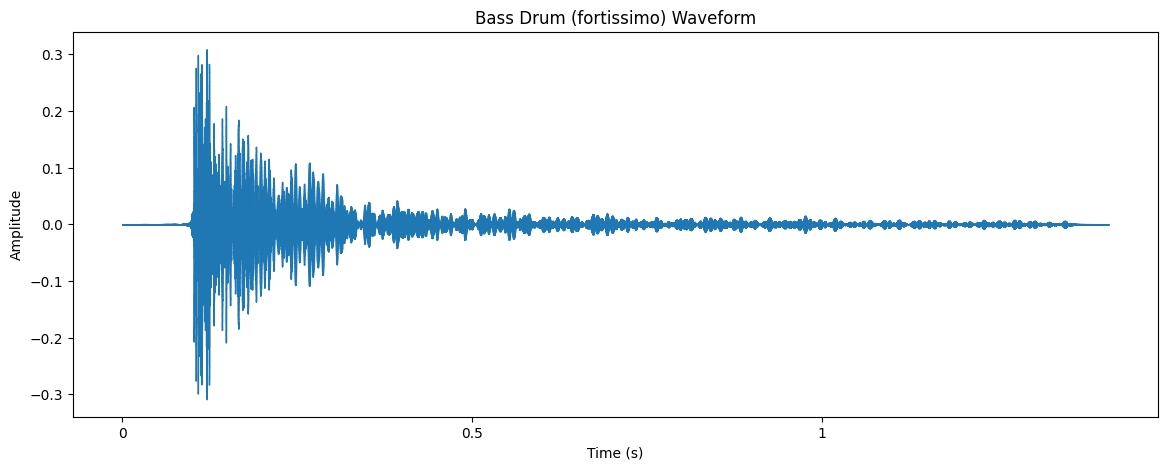

In [ ]:
y_bdf, sr_bdf = librosa.load(bass_drum_f, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_bdf, sr=sr_bdf)
plt.title('Bass Drum (fortissimo) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

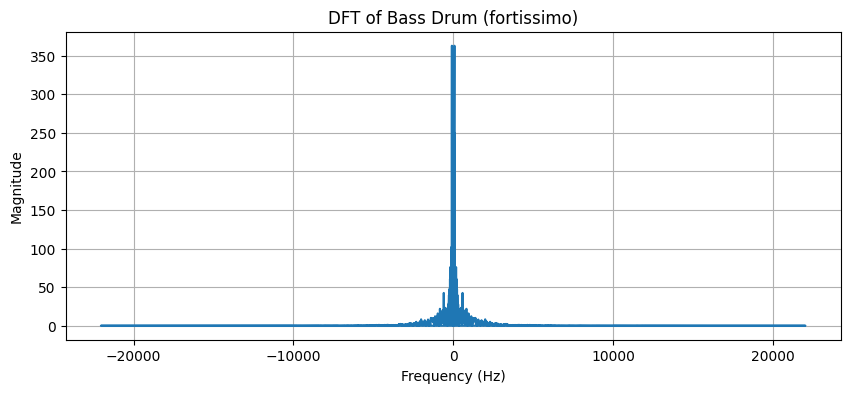

peak frequency at: 83.65162037037037 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_bdf)

# Compute frequencies corresponding to DFT components
n = len(y_bdf)
freq = np.fft.fftfreq(n, 1/sr_bdf)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of Bass Drum (fortissimo)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

As we can by both the Time and Spectral domains, the one obtained on the Bass Drum are very different from those of the two preceding harmonic instruments, as they do not show visible evenly spaced peaks (the harmonics).

To make the comparison even, let's have a look to another inharmonic instrument, a more bizarre one if we wish: the Thai Gong.

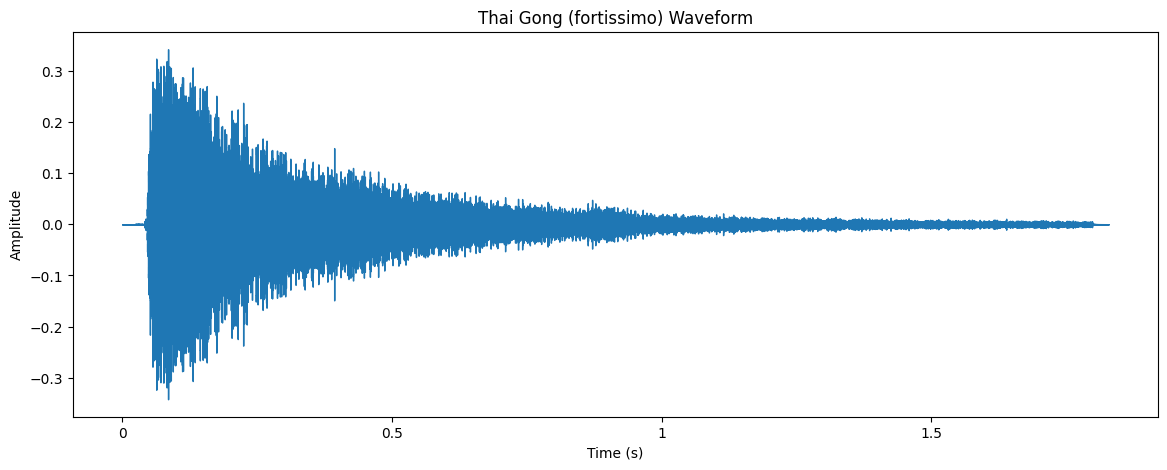

In [ ]:
y_tgff, sr_tgff = librosa.load(thai_gong_ff, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_tgff, sr=sr_tgff)
plt.title('Thai Gong (fortissimo) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

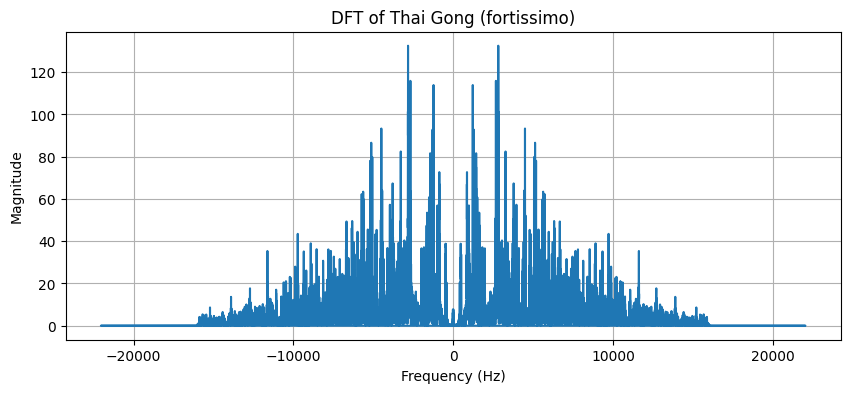

peak frequency at: 2676.953125 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_tgff)

# Compute frequencies corresponding to DFT components
n = len(y_tgff)
freq = np.fft.fftfreq(n, 1/sr_tgff)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of Thai Gong (fortissimo)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

And as expected, the graphs obtained are very similar in structure to those of the Bass Drum, while very different from the ones of the violin and the flute.

Let's see one more percussion, the Chinese Chymbal

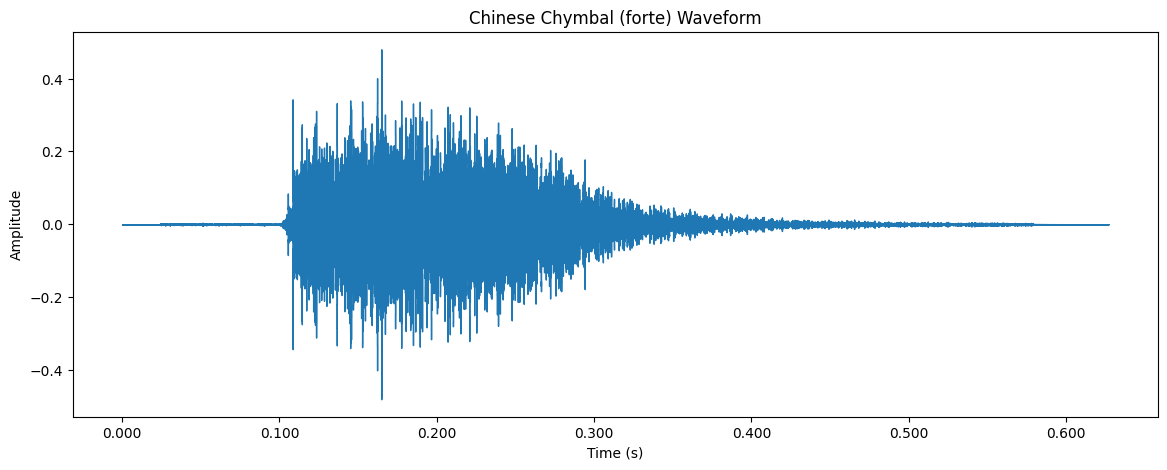

In [ ]:
y_ccf, sr_ccf = librosa.load(chinese_chymbal_f, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_ccf, sr=sr_ccf)
plt.title('Chinese Chymbal (forte) Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

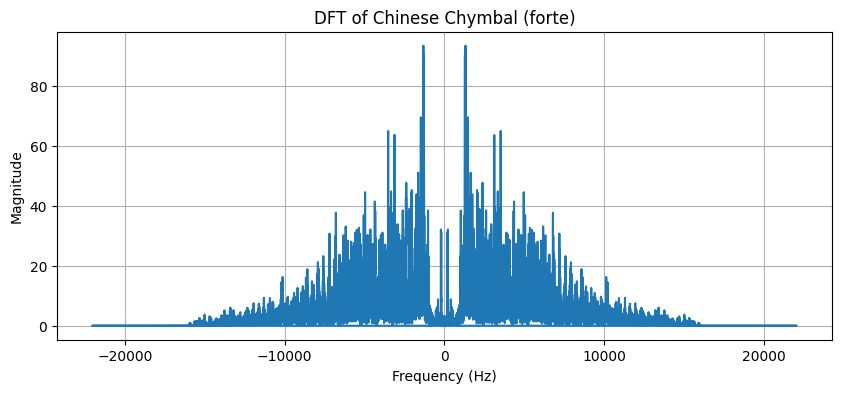

peak frequency at: 1319.1080729166667 Hz


In [ ]:
# Compute the DFT
dft_result = np.fft.fft(y_ccf)

# Compute frequencies corresponding to DFT components
n = len(y_ccf)
freq = np.fft.fftfreq(n, 1/sr_ccf)

# Plotting the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(dft_result))
plt.title('DFT of Chinese Chymbal (forte)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.yscale('log')
plt.grid(True)
plt.show()

print(f'peak frequency at: {abs(freq[np.argmax(dft_result)])} Hz')

and again, it exhibits a very similar behaviour to the other inharmonic instruments.

## Spectrograms
Now we will use a different tool from those seen up to now: the Spectrogram.

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

In order to derive a Spectrogram we will need to compute the Short-Time Fourier Transform (STFT in short). The procedure for computing STFT is to divide a longer time signal into shorter segments of equal length and then compute the Fourier transform separately on each shorter segment.

The Discrete-STFT is formally defined as:

\begin{align}
    STFT\{x[n]\}(m,\omega) = X(m,\omega) = \sum_{n=-\infty}^{\infty} x[n]w[n - m]e^{-i\omega n},
\end{align}

where:
- $ x[n] $ is the input signal, which is a function of the discrete variable $ n $. This represents the amplitude of the signal at each point in time;
- $ m $ is the time index around which the window function is centered. It effectively shifts the window function along the time axis of the signal;
- $ \omega $ is the frequency variable in radians per sample. This represents the angular frequency at which the signal is being analyzed by the STFT;
- $ w[n - m] $ is the window function, which is centered around $ m $. This function is applied to the signal to isolate a particular portion of it for analysis. The window function effectively "weights" the signal, giving more importance to data around the time index $ m $ and less importance to data further away from $ m $.

**Note**: all these terms are discretized when performing DFT with Fast Fourier Transform.

\\

The spectrogram is then defined as:

\begin{align}
    \text{spectrogram}\{x(t)\}(\tau, \omega) = |X(\tau, \omega)|^2.
\end{align}

\\

Let's make some points clear. When we refer to STFT we usually mean magnitude spectrograms, where the phase component has been discarded and only the DFT magnitudes are retained. In order to do so we take the absolute value of the STFT.

To compute the spectrogram, in this notebook, we are going to use the *stft* function by **librosa**, which returns a complex valued matrix D that contains both the magnitude and the phase, and from which we are only interested in the former (we will use the *abs* function to get the magnitude).

After that we are going to use the *amplitude_to_db* function to transform the amplitude values into dB (decibel) values. To do so, the *amplitude_to_db* function performs the *power_to_db* on the square of the STFT.

**Note**: we are going to plot the spectrograms in log scale in order to have a better visualization on the harmonic structures.

**Note** we are also going to plot the Mel Spectrograms in order to have a better visualization (even though they will reveal to be very similar to each other) to the pitches we are going to focus on. Mel spectrograms are advantageous because they closely align with human auditory perception, emphasizing the frequency components most critical to our hearing while compressing the less perceptible ranges, thereby offering a more intuitive and efficient representation of sound for audio analysis and processing tasks.

### Violin

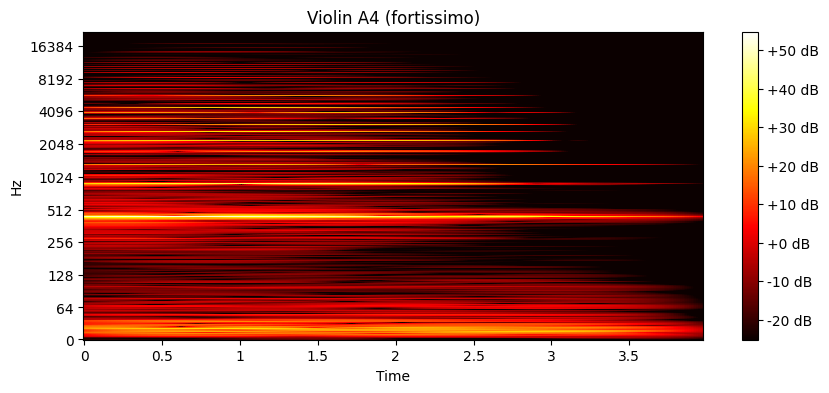

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_va4ff, n_fft=sr_va4ff, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_va4ff, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin A4 (fortissimo)')
plt.show()

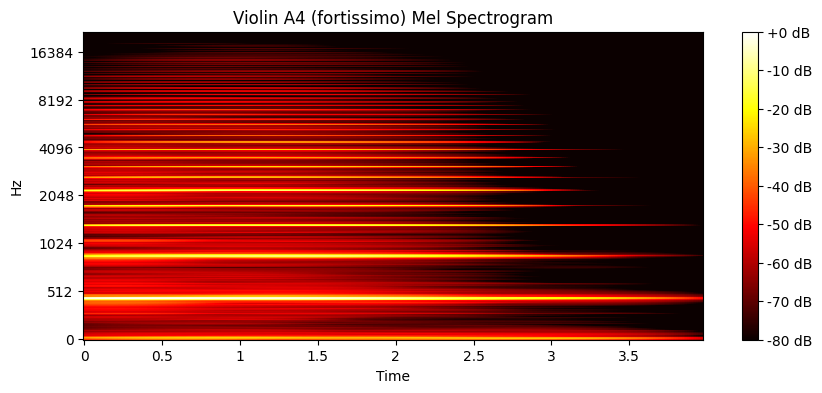

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_va4ff, sr=sr_va4ff, n_fft=sr_va4ff, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_va4ff, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin A4 (fortissimo) Mel Spectrogram')
plt.show()

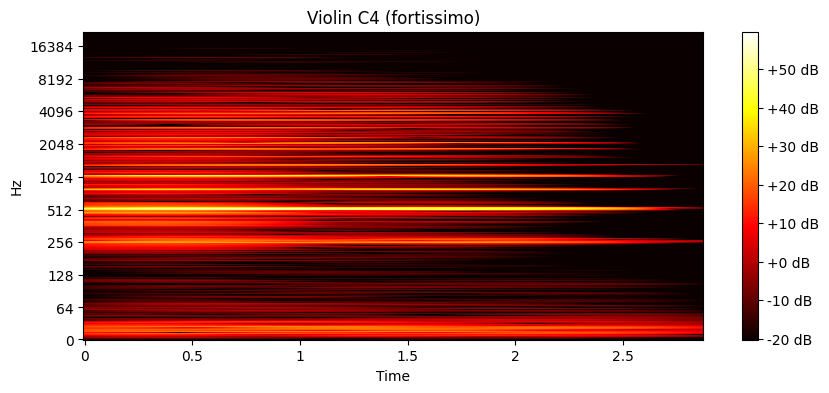

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_vc4ff, n_fft=sr_vc4ff, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_vc4ff, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin C4 (fortissimo)')
plt.show()

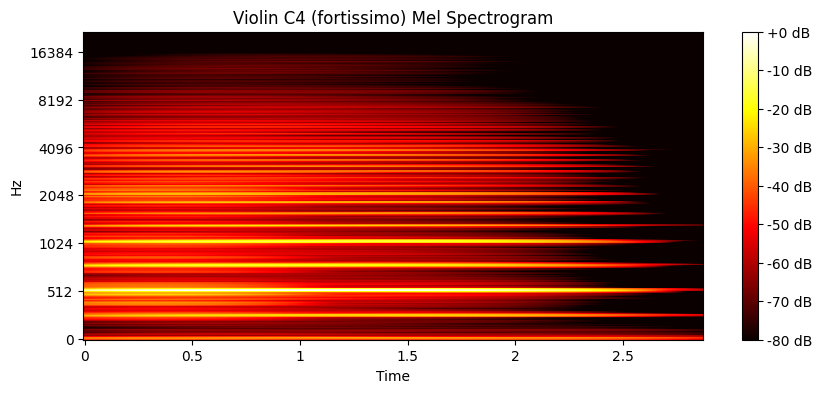

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_vc4ff, sr=sr_vc4ff, n_fft=sr_vc4ff, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_vc4ff, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin C4 (fortissimo) Mel Spectrogram')
plt.show()

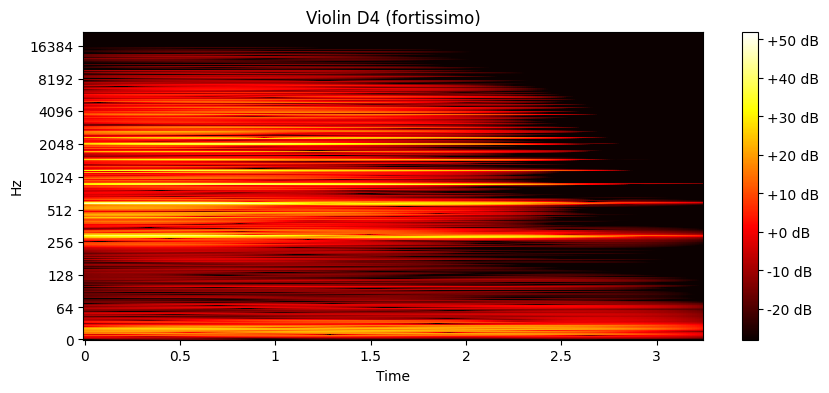

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_vd4ff, n_fft=sr_vd4ff, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_vd4ff, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin D4 (fortissimo)')
plt.show()

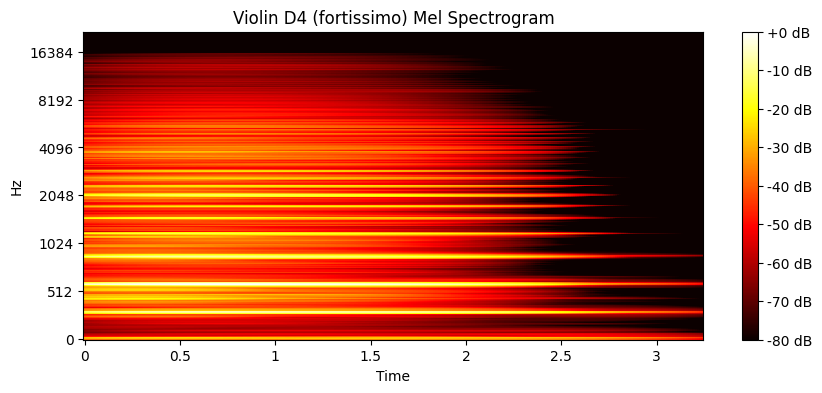

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_vd4ff, sr=sr_vd4ff, n_fft=sr_vd4ff, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_vd4ff, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin D4 (fortissimo) Mel Spectrogram')
plt.show()

### Flute

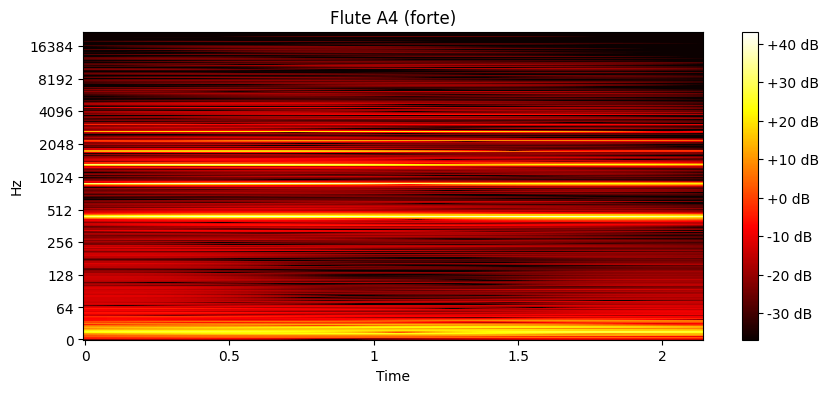

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_fa4f, n_fft=sr_fa4f, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_fa4f, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute A4 (forte)')
plt.show()

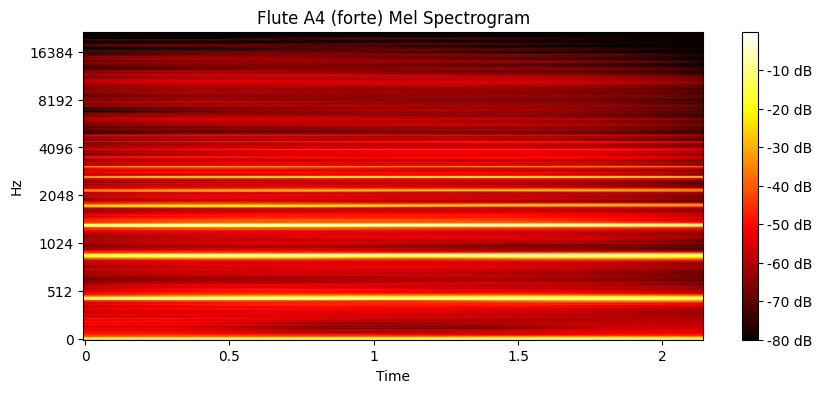

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_fa4f, sr=sr_fa4f, n_fft=sr_fa4f, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_fa4f, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute A4 (forte) Mel Spectrogram')
plt.show()

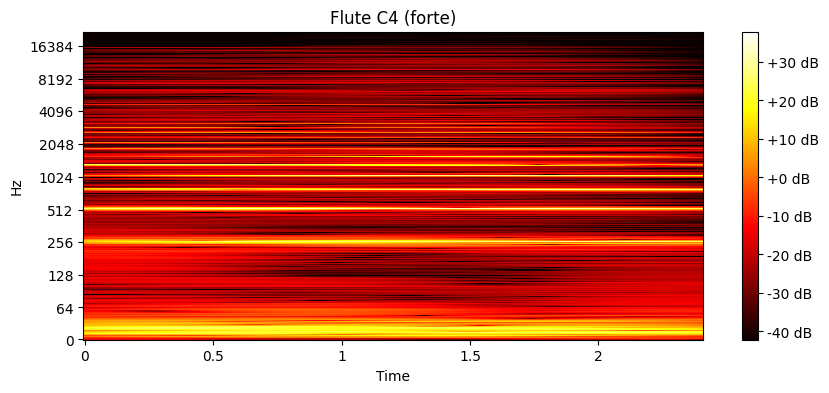

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_fc4f, n_fft=sr_fc4f, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_fc4f, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute C4 (forte)')
plt.show()

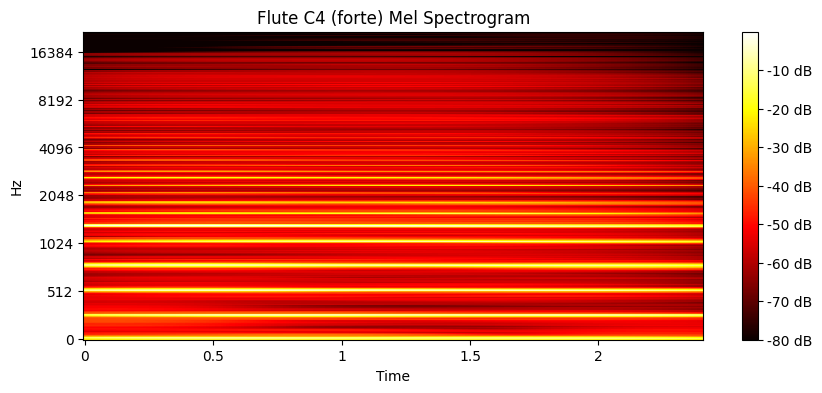

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_fc4f, sr=sr_fc4f, n_fft=sr_fc4f, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_fc4f, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute C4 (forte) Mel Spectrogram')
plt.show()

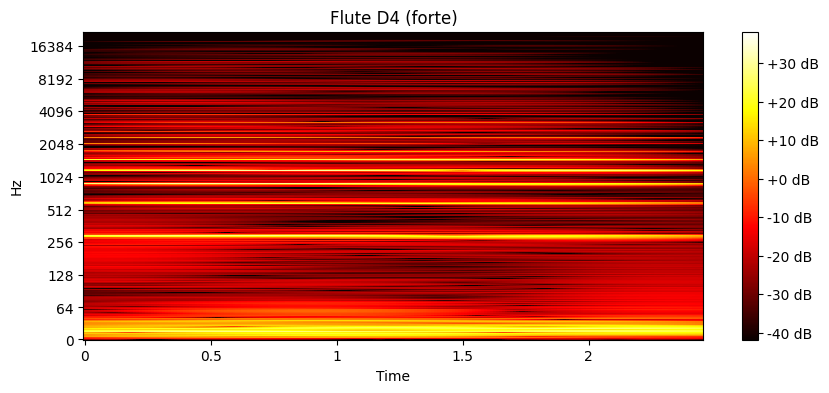

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_fd4f, n_fft=sr_fd4f, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_fd4f, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute D4 (forte)')
plt.show()

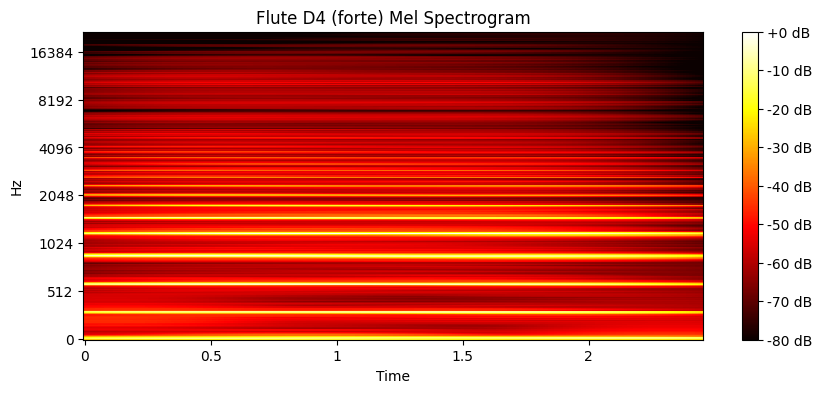

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_fd4f, sr=sr_fd4f, n_fft=sr_fd4f, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_fd4f, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Flute D4 (forte) Mel Spectrogram')
plt.show()

### *Differences in harmonic instruments*
The spectrograms of the two instruments clearly show some key differences:
- **Violin** 🎻: the fundamental frequency appears to be quite high on the dB scale, the harmonics tend to be thinner and their decay rate is quite fast, meaning that the frequencies of the higher harmonics do not persist as much as the fundamental one, rather they vanish rapidly. Though, the density of the harmonics is probably the most characterizing feature.
- **Flute** 🪈: The fundamental frequency is less loud than that observed on the violin (probably also because of the loudness of the note played, which is forte for the flute and fortissimo for the violin), and the amplitude of the harmonics seems to be more consistent than what observed previously. Thicker than the ones observed in the violin and with a slower decay rate, they persist longer and they are spaced wider.

### Percussions

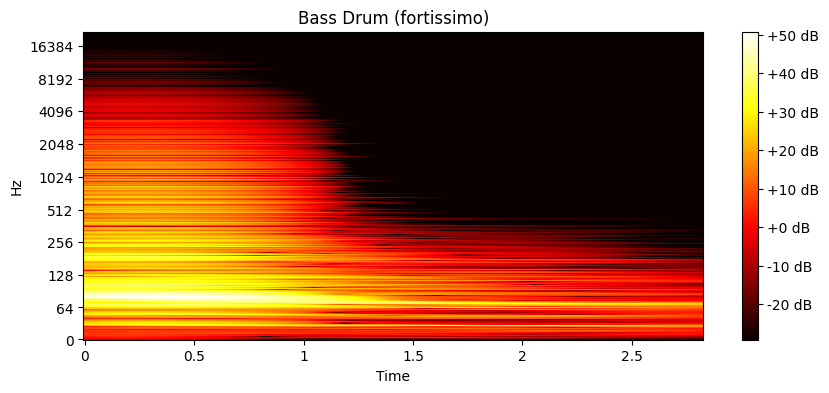

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_bdf, n_fft=sr_bdf, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_bdf, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Bass Drum (fortissimo)')
plt.show()

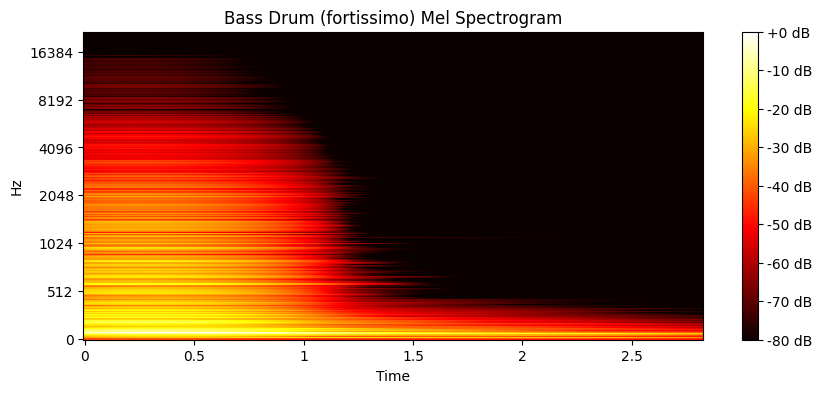

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_bdf, sr=sr_bdf, n_fft=sr_bdf, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_bdf, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Bass Drum (fortissimo) Mel Spectrogram')
plt.show()

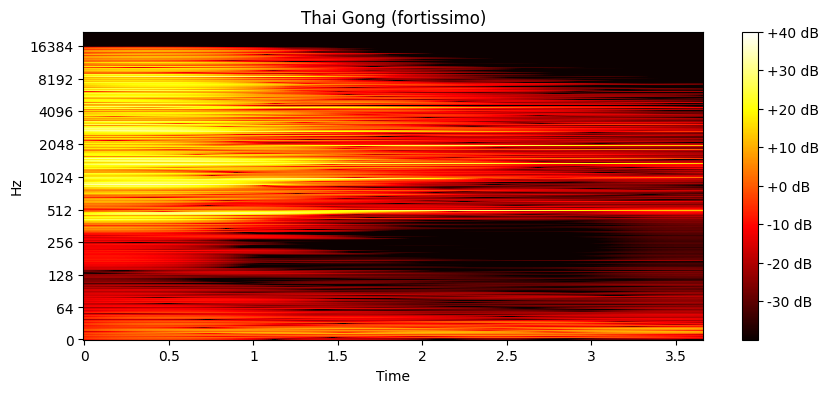

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_tgff, n_fft=sr_tgff, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_tgff, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Thai Gong (fortissimo)')
plt.show()

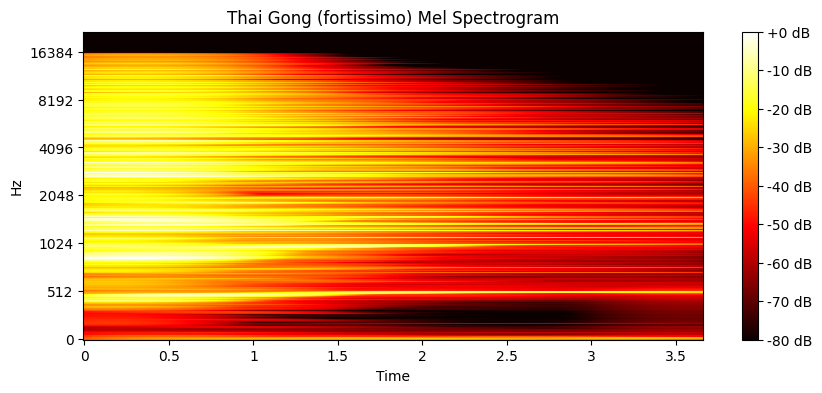

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_tgff, sr=sr_tgff, n_fft=sr_tgff, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_tgff, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Thai Gong (fortissimo) Mel Spectrogram')
plt.show()

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=44100 is too large for input signal of length=27648
  warnings.warn(


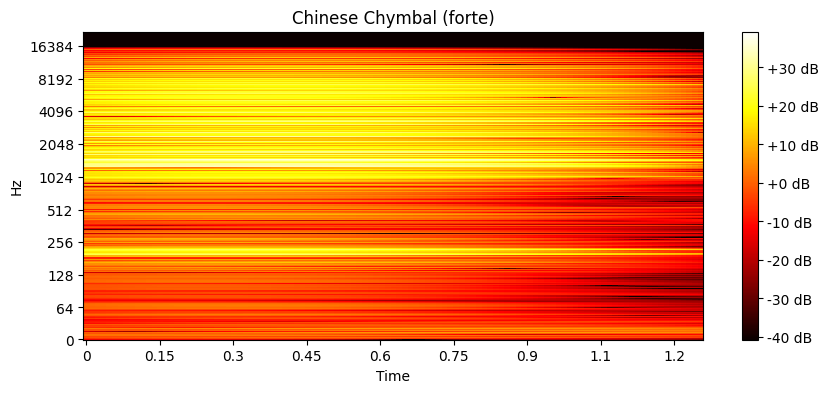

In [ ]:
# Compute the spectrogram (magnitude of the STFT)
S = librosa.amplitude_to_db(abs(librosa.stft(y_ccf, n_fft=sr_ccf, hop_length=256)))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr_ccf, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Chinese Chymbal (forte)')
plt.show()

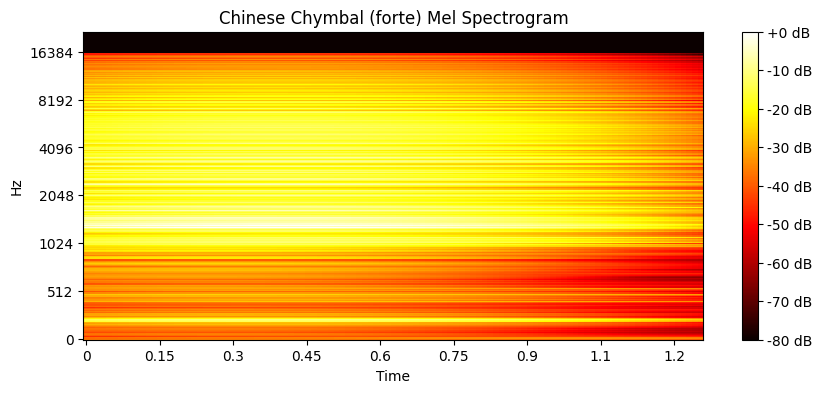

In [ ]:
# Compute the Mel spectrogram
S_mel = librosa.feature.melspectrogram(y=y_ccf, sr=sr_ccf, n_fft=sr_ccf, hop_length=256, n_mels=512)

# Convert to dB
S_mel_db = librosa.power_to_db(S_mel, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_mel_db, sr=sr_ccf, x_axis='time', y_axis='mel', cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.title('Chinese Chymbal (forte) Mel Spectrogram')
plt.show()

As observed in the last three spectrograms, they seem very different and less structured than those of the harmonic instruments. Still, differences might be observed between them.

### *Differences in inhamronic instruments*
In constrast to what we've seen with harmonic instruments, once again, inhamornic instruments are very unique in their spectral domain. Each of the analysed instruments has very different pattern in its frequency spectrum, which leads to the conclusion that they surely are more trickier to compare.

## Results of the analysis

As a bit of a recap, we analyzed 3 notes for harmonic instruments: A, C and D in their 4th octave, played in fortissimo and forte for the violin and flute respectively. The loudness chosen might have drifted the notes pitched by some octaves for some of the samples we have analyzed, as reported in the cells where that happened. The analysis though does not change and can therefore be carried on.

It is pretty clear how the spectral domain helps in understanding signals from which we could not grasp anything relevant by just looking at the time domain.

At first, we observed just the DFT, where the signal is decomposed as the set of frequencies that describes it. This happens by plotting the amplitude over the frequencies on the entire signal, resulting in a snapshot of the "frequencies' importance" on the signal analysed.

After that, we exploited a more powerful tool, the spectrogram, which gives us a way to visualize the DFT through time or, to be more specific, it makes us able to visualize how the frequencies' amplitudes change over time.

As far as the analysis goes, the spectrogram does provide a more visually helpful way to understand differences between pitches than the DFT alone, as it utilizes one additional dimension, i.e. the time. This way not only we have an undestanding of the frequencies' characterization of the signal, but also how they behave on time (as we have seen for the violin, for example, the harmonics were very fast on decaying).

To address the question of whether spectrograms are sufficient for recognizing different musical instruments, it is confirmed that they indeed play a significant role in distinguishing them. This distinction is primarily observable in harmonic instruments, which exhibit unique characteristics such as harmonic structure, decay rate, and dynamic range. However, identifying these features in spectrograms requires specialized knowledge of the instruments and an understanding of how their properties translate into visual patterns. Therefore, while spectrograms are rich in information, effectively classifying instruments based on their spectrograms alone demands expertise.
Nonetheless, it is reasonable to argue, and I concur, that machine learning models could excel in this task. Given the dense information encapsulated in spectrograms, a well-designed machine learning algorithm has the potential to accurately classify instruments by learning from these nuanced visual cues.

Also, as it has been clearly shown during the notebook, that inharmonic instruments might be a bit tricky to be distinguished one alike since they do not decompose into integer multiples of the fundamental frequency of the pitch played. Given that, it is obviously easier to differentiate inharmonic instruments from harmonic ones.

**Useful notes**: the series were loaded preserving their original sampling rate (which is definitely higher than the default one, and probably higher than what needed). This is easily observable as the frequencies plotted are very many and they probably do capture some noise too.

## Personal consideration
The task chosen was of particular interest to me, as a passionate about music. It gave me the chance to explore various interesting notions about this phenomenal world, while deepening my knowledge on the spectral analysis.
Even though not necessary, I preferred starting from the DFT as a baseline, in order to assess the basic understanding needed to further explore spectrograms.
Overall the task was fun but brief, and surely the analysis proposed would benefit of a deeper look into variations in notes, octaves and style of playing.